## Data Analysis

### Importing Libraries

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics


In [ ]:
nltk.download('wordnet')

### Data Exploration

In [104]:
df = pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")
wordcloud = pd.read_csv("./data/spam.csv", encoding="ISO-8859-1")

df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [7]:
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[to_drop], axis=1)

# Renaming the columns
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0, 0.5, 'Number of Data')

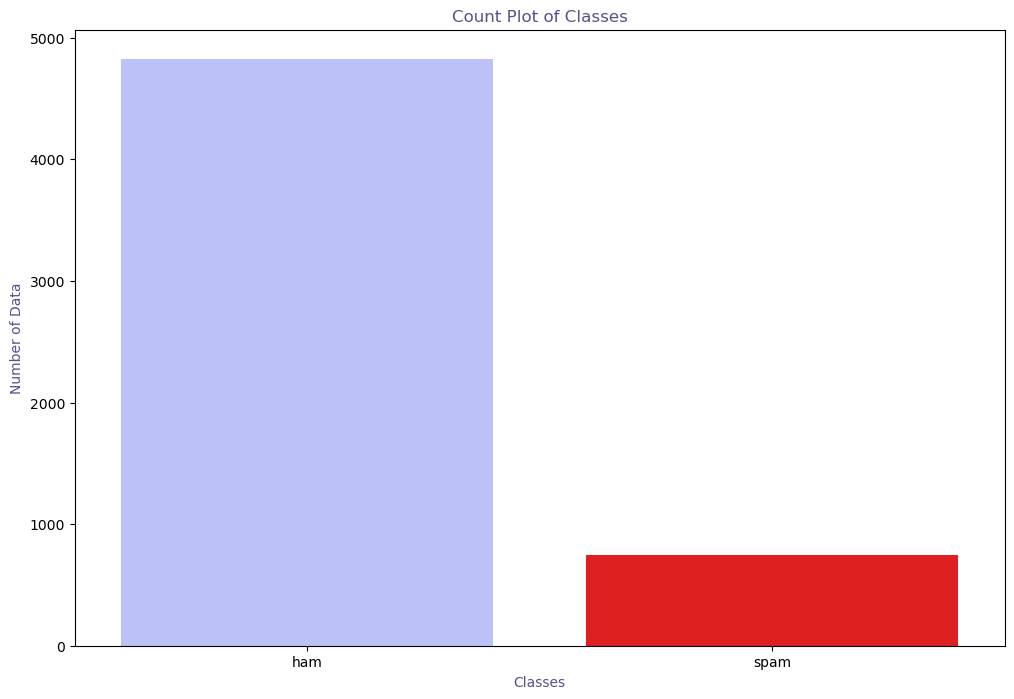

In [8]:
cols= ["#b2baff", "#ff0000"]

# Create count plot of Target column
plt.figure(figsize=(12,8))
fg = sns.countplot(x= "Target", hue="Target", data=df, palette= cols, legend=False)

# Set plot title, x and y labels
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data", color="#58508d")

As can be seen from the Raw and Spam graph, our data set is not evenly distributed.

<Axes: title={'center': 'Average Number of Sentences'}, xlabel='type', ylabel='sentences'>

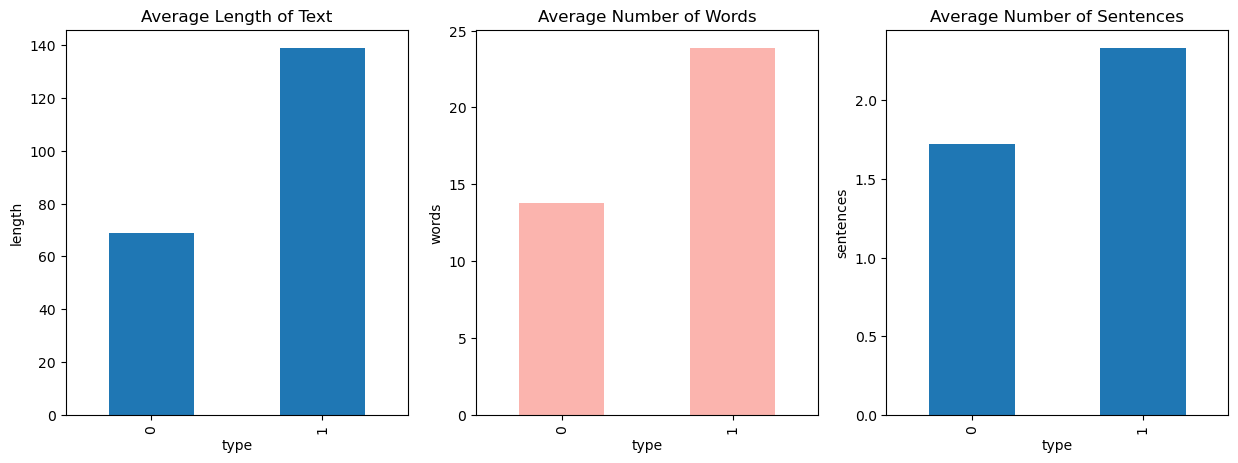

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

df.groupby("Target").apply(lambda x: x["Text"].apply(len).mean()).plot(
    kind="bar", ax=ax1, title="Average Length of Text",xlabel="type",ylabel="length")

df.groupby("Target").apply(lambda x: x["Text"].apply(lambda x: len(
    x.split())).mean()).plot(kind="bar", ax=ax2, title="Average Number of Words",xlabel="type",ylabel="words",colormap="Pastel1")

df.groupby("Target").apply(lambda x: x["Text"].apply(lambda x: len(x.split(
    ". "))).mean()).plot(kind="bar", ax=ax3, title="Average Number of Sentences",xlabel="type",ylabel="sentences")

(-0.5, 799.5, 511.5, -0.5)

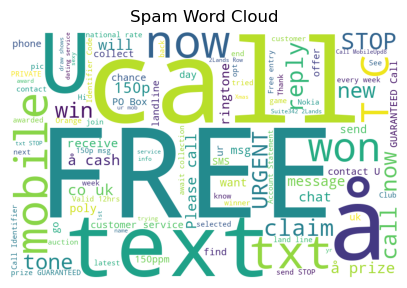

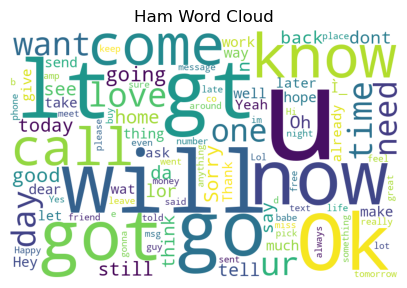

In [106]:


spam_words = ' '.join(list(wordcloud[wordcloud['v1'] == 'spam']['v2']))
spam_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(spam_words)

plt.figure(figsize = (5, 6))
plt.title('Spam Word Cloud')
plt.imshow(spam_wc)
plt.axis('off')


ham_words = ' '.join(list(wordcloud[wordcloud['v1'] == 'ham']['v2']))
ham_wc = WordCloud(width = 800,height = 512,max_words=100,background_color="white").generate(ham_words)

plt.figure(figsize = (5, 6))
plt.title('Ham Word Cloud')
plt.imshow(ham_wc)
plt.axis('off')

#### Feature Engineering

In [10]:
# Create a new column 'No_of_Characters' and apply the len() function to each value in the 'Text' column
# len() returns the number of characters in a string, so this gives us the number of characters in each text message
df["No_of_Characters"] = df["Text"].apply(len)

# Use the apply() function to tokenize each text message into words and count the number of words in each message
# We use the nltk.word_tokenize() function to tokenize the text into words, and then apply the len() function to count the number of words
# We set axis=1 to apply the function to each row, rather than each column
df["No_of_Words"] = df.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)

# Similarly, tokenize each text message into sentences and count the number of sentences in each message
# We use the nltk.sent_tokenize() function to tokenize the text into sentences, and then apply the len() function to count the number of sentences
df["No_of_sentence"] = df.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

# Print the summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1200x800 with 0 Axes>

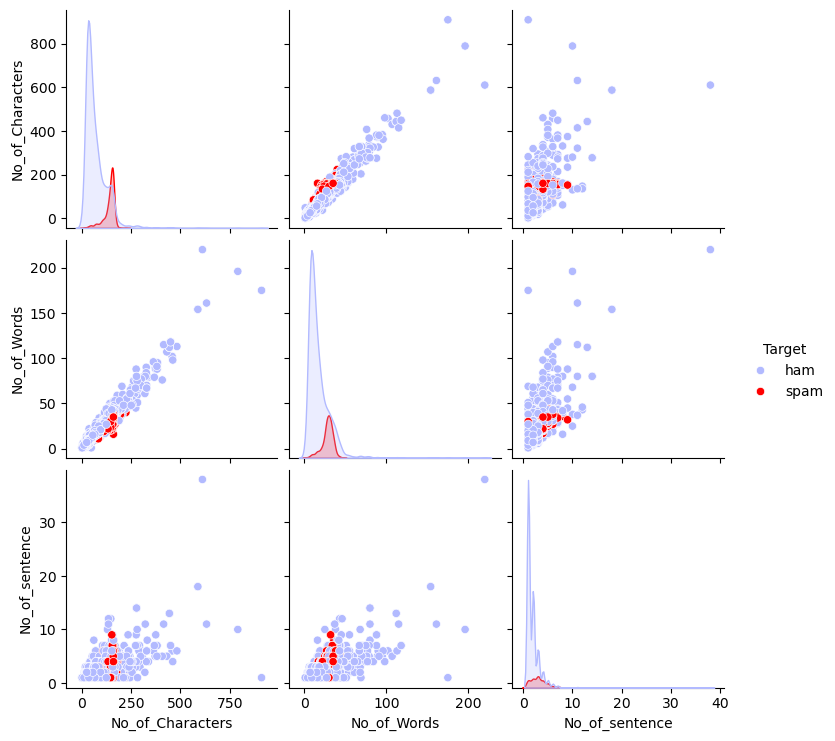

In [16]:
plt.figure(figsize=(12,8))
plt.show(sns.pairplot(data=df, hue="Target",palette=cols))
# note: pairplot is a powerful tool for visualizing and understanding the relationships between multiple variables in a dataset.

When we use pair plot, we can see a few outliers in the class. Now lets drop the outliers.

#### Drop the Outliers

In [20]:
# Only keep rows where the number of characters is less than 350
df = df[(df["No_of_Characters"]<350)]
df.shape

(5548, 5)

<Figure size 1200x800 with 0 Axes>

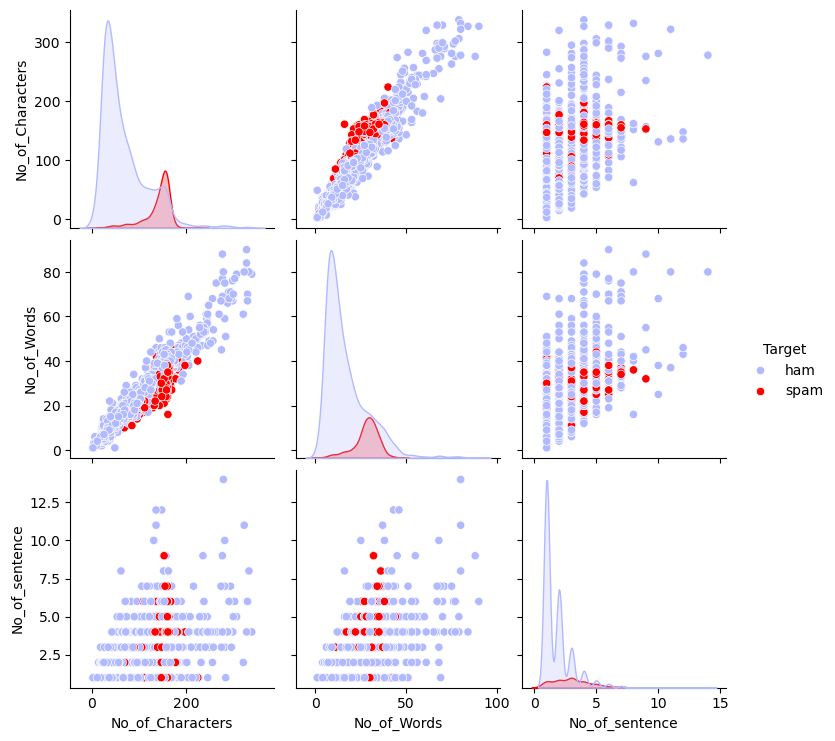

In [19]:
plt.figure(figsize=(12,8))
plt.show(sns.pairplot(data=df, hue="Target",palette=cols))

## Data Preprocessing

### Text Cleaning

Text cleaning and preprocessing is a crucial step in NLP. It can essentially affect the execution of your show and the precision of your results. By understanding and correctly applying these methods, you'll ensure that your data is within the best possible shape for analysis.

- First, remove punctuation and number.
- Then, convert all the chars into lowercase.

In [30]:

# The 'sep' argument in the 'print' function is used to specify the separator between the arguments.
# Here, it is set to '\n' so that each text is printed on a new line.
print("The First 10 Texts:\n",*df["Text"][:10], sep = "\n")

The First 10 Texts:

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 mon

In [77]:
def Clean(Text):
    # Remove all non-alphabetic characters with a space
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    
    # Convert to lowercase
    sms = sms.lower()
    
    # Split the string into words
    sms = sms.split()
    
    # Join the words back into a single string with spaces between them
    sms = ' '.join(sms)
    
    return sms

# Apply the Clean function to each item in the "Text" column and create a new column "Clean_Text"
df["Clean_Text"] = df["Text"].apply(Clean)

# Print the first 10 texts after cleaning
print("The First 10 Texts after cleaning:\n", *df["Clean_Text"][:10], sep = "\n")

The First 10 Texts after cleaning:

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call th

### Tokenization

Tokenization is the process of converting a sequence of text into smaller parts, known as tokens. These tokens can be as small as characters or as long as words.

In [42]:
# Tokenize the text in the "Clean_Text" column of the dataframe using NLTK's word_tokenize function
# The tokenized text is added to a new column called "Tokenize_Text"
df["Tokenize_Text"]=df.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

print("The First 5 Texts after Tokenizing:\n",*df["Tokenize_Text"][:5], sep = "\n")

The First 5 Texts after Tokenizing:

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


### Stopwords

Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”. In NLP, stopwords are used to eliminate unimportant words, allowing applications to focus on the important words instead. NLTK library has a set of default stopwords. 

In [44]:
# Function to remove stopwords from the text
def remove_stopwords(text):
   # Creating a set of English stopwords
   stop_words = set(stopwords.words("english"))
   
   # Filtering the text to remove stopwords
   filtered_text = [word for word in text if word not in stop_words]
   
   # Returning the filtered text
   return filtered_text

# Applying the function to the 'Tokenize_Text' column of the dataframe 'df'
df["Nostopword_Text"] = df["Tokenize_Text"].apply(remove_stopwords)

# Printing the first 5 texts after removing the stopwords
print("The First 5 Texts after removing the stopwords:\n", *df["Nostopword_Text"][:5], sep = "\n")

The First 5 Texts after removing the stopwords:

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


### Lemmatization

Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities.

In [52]:
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    """
    This function takes a string as input and returns a list of lemmatized words.
    The function uses WordNetLemmatizer to lemmatize each word in the input string.
    """

    # Lemmatize each word in the input string with the part-of-speech tag as 'v' (verb)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    
    return lemmas

# Apply the lemmatize_word function to each row in the "Nostopword_Text" column of the dataframe
df["Lemmatized_Text"] = df["Nostopword_Text"].apply(lemmatize_word)
print("The First 5 Texts after lemmatization:\n",*df["Lemmatized_Text"][:5], sep = "\n")

The First 5 Texts after lemmatization:

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


### Vectorization

TF-IDF in NLP stands for Term Frequency – Inverse document frequency. NLP refers to the process of converting textual data, such as sentences or documents, into numerical vectors that can be used for data analysis, machine learning, and other computational tasks. Also known as word embedding or word vectorization.

In [55]:
# Creating an empty list to store our collection of text features
collection = []

# Looping through each row in the "Lemmatized_Text" column of the dataframe
for i in df["Lemmatized_Text"]:
    
    # Joining the list of lemmatized words into a single string with spaces in between
    msg = ' '.join([row for row in i])
    
    # Appending the string to our collection list
    collection.append(msg)
    
# Printing the first 5 lines of the collection
print("The First 5 lines in collection :\n", *collection[:5], sep = "\n")

The First 5 lines in collection :

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [59]:
# Creating an instance of TfidfVectorizer
tfidf = TfidfVectorizer()

# Transforming the text data into a matrix of TF-IDF features
# Fitting the vectorizer to the collection and transforming it to a numpy array
X = tfidf.fit_transform(collection).toarray()

# Displaying the data type of the matrix of TF-IDF features
X.dtype

dtype('float64')

In [61]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Label encode the 'Target' column of the dataframe 'df'
# and overwrite the existing 'Target' column with the encoded values
df["Target"] = label_encoder.fit_transform(df["Target"])

# The 'Target' column is now label-encoded and can be used as 'y' for training machine learning models

## Modelling

Model Building Steps:
1. Define Features and Target Variables:
   - Set up features and target variables as X and y.
2. Data Splitting:
   - Split the dataset into training and testing sets.
3. Build Model Pipelines:
   - Create pipelines for six different classifiers:
      - Naïve Bayes
      - RandomForest Classifier
      - KNeighbors Classifier
      - Support Vector Machines
      - Logistic Regression
      - DecisionTree Classifier
4. Model Training:
   - Fit all the models using the training data.
5. Cross-Validation:
   - Perform cross-validation on the training set to assess model accuracy for each classifier.

In [63]:
# Setting the target variable 'Target' as y
y = df["Target"]

# Splitting the dataset into training and testing sets
# X is the set of feature variables, which we already created in the vectorizing step
# test_size is the proportion of the dataset to include in the test split (0.2 = 20%)
# random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Define the classifiers to be tested
classifiers = [
    MultinomialNB(),  # Naive Bayes classifier
    RandomForestClassifier(),  # Random Forest classifier
    KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    SVC(),  # Support Vector Classifier
    LogisticRegression(),
    DecisionTreeClassifier()
    
    
]

# Train the classifiers on the training data
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {
    0: "NaiveBayes",  # Naive Bayes classifier
    1: "RandomForest",  # Random Forest classifier
    2: "KNeighbours",  # K-Nearest Neighbors classifier
    3: "SVC",  # Support Vector Classifier
    4: "LogisticRegression",
    5: "DecisionTree"
}

In [110]:
# Loop through each model in the classifiers list
for i, model in enumerate(classifiers):
    
    # Perform 10-fold cross-validation on the training data using the current model
    cv_score = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=10)
    
    # Calculate and print the mean cross-validation score for the current model
    print("%s: %f" % (pipe_dict[i], cv_score.mean()))

NaiveBayes: 0.967552
RandomForest: 0.973185
KNeighbours: 0.911450
SVC: 0.974086
LogisticRegression: 0.955611
DecisionTree: 0.961466


### Evaluating Models

Model Evaluation on Test Set:

- Accuracy Report:
Assess the overall accuracy of the models by comparing predicted outcomes with actual results on the test set.

- Confusion Matrix:
Examine the confusion matrix to gain insights into the performance of each model, revealing true positives, true negatives, false positives, and false negatives. This matrix provides a more detailed understanding of the classification performance.

In [111]:
from sklearn import metrics

# Model Evaluation
# creating lists to store various scores
precision = []
recall = []
f1_score = []
trainset_accuracy = []
testset_accuracy = []

# loop through each classifier
for i in classifiers:

    # predict the training and testing data
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)

    # calculate precision, recall, and f1 score
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)

    # calculate training and testing accuracy using accuracy_score
    train_accuracy = metrics.accuracy_score(y_train, pred_train)
    test_accuracy = metrics.accuracy_score(y_test, pred_test)
  
    # append the scores to the respective lists
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


In [113]:
# Calculate the evaluation metrics for each model and store them in the dictionary
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}

# Repeat the above steps for the other models (NaiveBayes, RandomForest, KNeighbours, SVC, LogisticRegression, DecisionTree) and store the results in the dictionary

# Convert the dictionary into a pandas DataFrame
Results = pd.DataFrame(data, index =["NaiveBayes", "RandomForest", "KNeighbours","SVC","LogisticRegression","DecisionTree"])

In [114]:
cmap2 = ListedColormap(["#b2baff", "#7283ff"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.705882,0.827586,0.963964,0.976341
RandomForest,1.000000,0.823529,0.903226,0.978378,1.000000
KNeighbours,0.977778,0.323529,0.486188,0.916216,0.927219
SVC,0.990909,0.801471,0.886179,0.974775,0.997521
LogisticRegression,0.979592,0.705882,0.820513,0.962162,0.972510
DecisionTree,0.893130,0.860294,0.876404,0.970270,1.000000


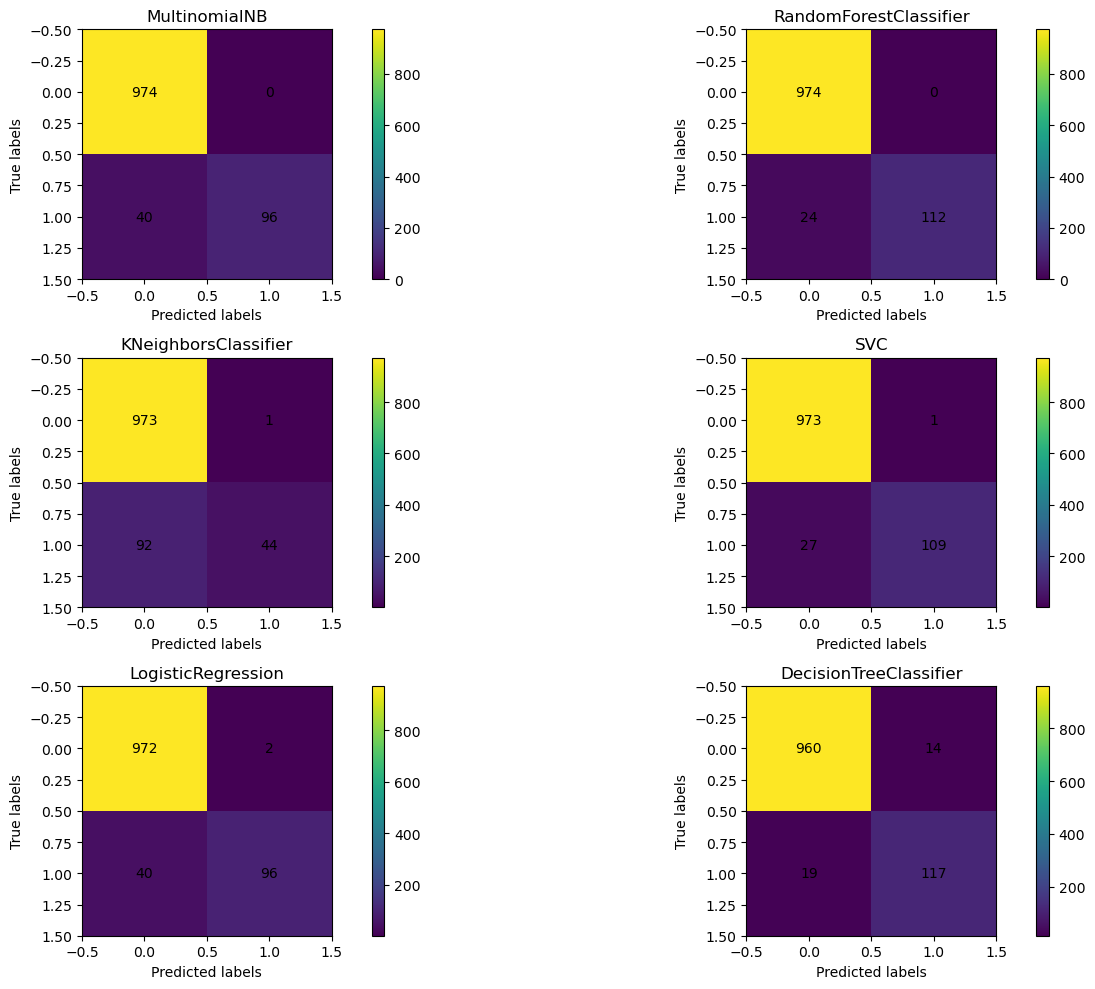

In [116]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for cls, ax in zip(classifiers, axes.flatten()):
    # Predict the test set
    y_pred = cls.predict(X_test)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Display the confusion matrix using imshow
    im = ax.imshow(cm, interpolation='nearest')
    
    # Add numbers to the cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="black")
    
    # Add colorbar
    plt.colorbar(im, ax=ax)
    
    # Set labels
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    
    # Set title as the classifier's name
    ax.set_title(type(cls).__name__)

plt.tight_layout()
plt.show()


### Compare to testing.ipynb

In [176]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [177]:
print("Train Accuracy: ", rf.score(X_train, y_train))
print("Test Accuracy: ", rf.score(X_test, y_test))
print("Train Precision: ", precision_score(
    y_train, rf.predict(X_train)))
print("Test Precision: ", precision_score(y_test, rf.predict(X_test)))

Train Accuracy:  1.0
Test Accuracy:  0.9783783783783784
Train Precision:  1.0
Test Precision:  1.0


In [178]:
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

In [183]:


modelsdict = {"RF": rf}

scoresdict = {}

for key, value in modelsdict.items():
    # Assuming X_train and X_test are dense NumPy arrays
    train_predictions = value.predict(X_train)
    test_predictions = value.predict(X_test)

    # Calculate accuracy and precision for training set
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='weighted')  # Use 'weighted' for multiclass

    # Calculate accuracy and precision for testing set
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='weighted')  # Use 'weighted' for multiclass

    scoresdict[key] = [train_accuracy, train_precision, test_accuracy, test_precision]

scoresdf = pd.DataFrame(scoresdict, index=["Train_ACC", "Train_Prec", "Test_ACC", "Test_Prec"]).T


In [184]:
scoresdf.sort_values(by="Test_ACC",ascending=False)

,Train_ACC,Train_Prec,Test_ACC,Test_Prec
RF,1.0,1.0,0.978378,0.978898
